**Text Classification:**

**Text Classification** is the process of classifying the text into two or more than two categories or classes. Instances of texts can only be categorised under one label at a time.

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import emoji
import emot
import string
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import scikitplot as skplt
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
pd.options.mode.chained_assignment=None
nltk.download('punkt')
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\divit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#Reading the csv file
df=pd.read_csv('D:/Sentiment Analysis/Emotions_training.csv')

**Data Preprocessing:**

**Data Preprocessing** is the process of preparing the raw data and making it suitable for a machine learning model.

In [3]:
#Abbreviations for Chat Conversations
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [4]:
#Converting emojis to words
def convert_emojis(text):
    return emoji.demojize(text)
df['text']=df['text'].apply(convert_emojis)

#Converting emoticons to the text
def convert_emoticons(text):
    for emoticon in emot.emo_unicode.EMOTICONS_EMO:
        text= text.replace(emoticon, emot.emo_unicode.EMOTICONS_EMO[emoticon])
    return text
df['text']=df['text'].apply(convert_emoticons)

#Lower Casing
df['text']=df['text'].str.lower()

#Remove Links
def remove_urls(links):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', links)
df['text']=df['text'].apply(remove_urls)

#Remove HTML Tags(if any)
def html_tags(tags):
    tag_pattern = re.compile(r'<.*?>')
    return tag_pattern.sub(r'', tags)
df['text']=df['text'].apply(html_tags)

#Remove next lines
df['text']=df['text'].replace('\n',' ',regex=True)

#Chat Words Conversion
def chat_conversion(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word
df['text']=df['text'].apply(chat_conversion)

#Removing Words containing numbers
def remove_num(text):
    return re.sub(r'\S*\d\S*','',text)
df['text']=df['text'].apply(remove_num)

#Removing Extra Spaces
def extra_spaces(text):
    return re.sub(r' +',' ',text)
df['text']=df['text'].apply(extra_spaces)

#Removing Special Characters
df['text']=df['text'].replace(r'[^A-Za-z0-9]+',' ',regex=True)

#Removing the StopWords
stop_words=set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df['text']=df['text'].apply(lambda text: remove_stopwords(text))

#Stemming
stemmer=PorterStemmer()
def stem_words(text):
    word_tokens=text.split()
    stems=' '.join([stemmer.stem(word) for word in word_tokens])
    return stems
df['text'] =df['text'].apply(stem_words)

#Lemmatization
lemmatizer=WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df['text']=df['text'].apply(lambda text: lemmatize_words(text))

df.head(15)

,text,label
0,didnt feel humili,0
1,go feel hopeless damn hope around someon care ...,0
2,im grab minut post feel greedi wrong,3
3,ever feel nostalg fireplac know still properti,2
4,feel grouchi,3
5,ive feel littl burden late wasnt sure,0
6,ive take milligram time recommend amount ive f...,5
7,feel confus life teenag jade year old man,4
8,petrona year feel petrona perform well made hu...,1
9,feel romant,2


**Exploratory Data Analysis (EDA):**

**EDA** is a crucial step in data science projects and involves analyzing and visualizing data to understand its key characteristics.

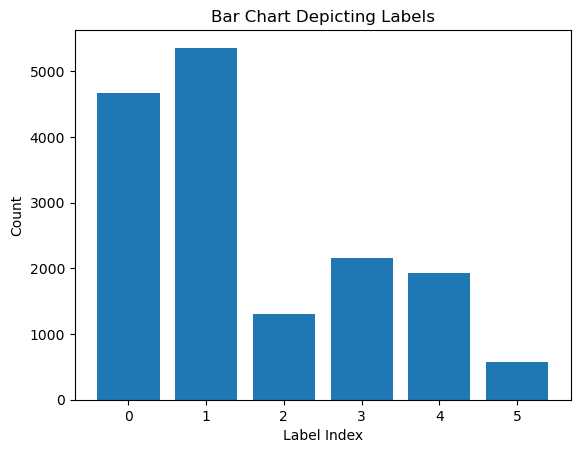

In [5]:
label_counts=df['label'].value_counts()

#Plotting a graph about the labels
plt.bar(label_counts.index, label_counts.values)
plt.title('Bar Chart Depicting Labels')
plt.ylabel('Count')
plt.xlabel('Label Index')
plt.show()

As the above bar chart depicts that the data is multiclass imbalanced, therefore we need to either balance the data or use boosting algorithms for building the models as boosting algorithms work well with imbalanced data.

**Word Cloud:**

**Word Cloud** is a visualization technique used to display keywords from the dataset.

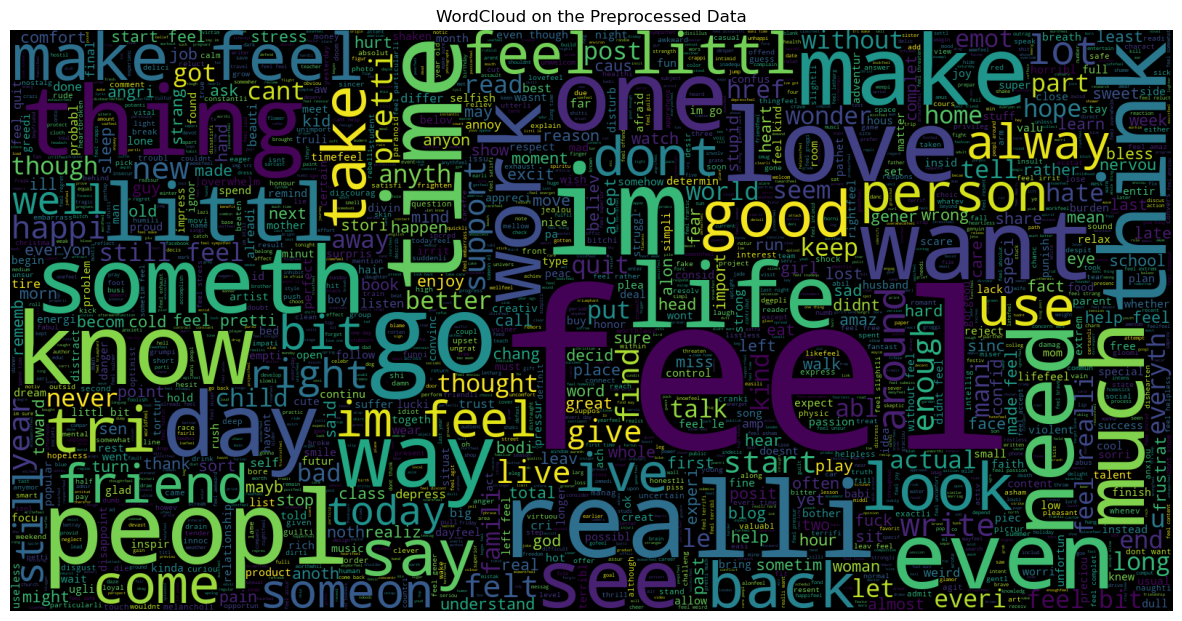

In [6]:
#Generating the Word Cloud
wordcloud = WordCloud(background_color="black", max_words=2000, max_font_size=300, width=1600, height=800)
wordcloud.generate(''.join(df['text'].str.lower()))

plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordCloud on the Preprocessed Data')
plt.show()

**Separating Independent & Dependent Features**

In [7]:
x = df['text'].values
y = df['label'].values

**TFIDF Vectorization:**

**Term Frequency-Inverse Document Frequency** can be defined as the calculation of how relevant a word in a series or corpus is to a text.

In [8]:
tfidf_vectorizer = TfidfVectorizer()
x = tfidf_vectorizer.fit_transform(x)

**Train and Split Data for Model Training:**

**Stratified Splitting** means that when you generate a training/validation dataset split, it will attempt to keep the same percentages of classes in each split.

In [9]:
#Splitting the Dataset into train, test and validation datasets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify =y)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

#split dataset size
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11200, 10326) (11200,)
(2400, 10326) (2400,)
(2400, 10326) (2400,)


**XGBoost Model Training and Results Evaluation:**

**eXtreme Gradient Boosting** is a popular machine learning algorithm used for various tasks. The base idea behind XGBoost algorithm is to build a decision tree as a base model and then build an ensemble of these trees to improve the accuracy of predictions.

In [10]:
#Training and finding the best parameters with XGBoost Model
xgb = XGBClassifier()
xgb_params = {"n_estimators": [100, 150],        #HyperParameter Tuning
              "subsample": [0.5,0.8],
              "max_depth": [3,5],
              "learning_rate": [0.1,0.01,0.3]}
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=3, n_jobs=-1, verbose=2).fit(x_train,y_train)
xgb_cv_model.best_params_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}

In [11]:
#Training and testing with the best parameters
xgb_best = XGBClassifier(learning_rate=0.3, max_depth=5, n_estimators=150, subsample=0.8, decision_function_shape='ovr', probability=True).fit(x_train,y_train)
y_pred_train = xgb_best.predict(x_train)
y_pred_test = xgb_best.predict(x_test)
y_probas = xgb_best.predict_proba(x_test)

In [12]:
#Obtaining metrics data like accuracy, recall, f1 score, precision
training_data_accuracy_xgb = accuracy_score(y_pred_train,y_train)
print("Accuracy on Training Data: ", training_data_accuracy_xgb)
test_data_accuracy_xgb = accuracy_score(y_pred_test,y_test)
print("Accuracy on Test Data: ", test_data_accuracy_xgb)

training_data_f1score_xgb = f1_score(y_pred_train,y_train, average='macro')
print("F1 Score on Training Data: ", training_data_f1score_xgb)
test_data_f1score_xgb = f1_score(y_pred_test,y_test, average='macro')
print("F1 Score on Test Data: ", test_data_f1score_xgb)

training_data_precision_xgb = precision_score(y_pred_train,y_train, average='macro')
print("Precision on Training Data: ", training_data_precision_xgb)
test_data_precision_xgb = precision_score(y_pred_test,y_test, average='macro')
print("Precision on Test Data: ", test_data_precision_xgb)

training_data_recall_xgb = recall_score(y_pred_train,y_train, average='macro')
print("Recall on Training Data: ", training_data_recall_xgb)
test_data_recall_xgb = recall_score(y_pred_test,y_test, average='macro')
print("Recall on Test Data: ", test_data_recall_xgb)

Accuracy on Training Data:  0.955
Accuracy on Test Data:  0.8470833333333333
F1 Score on Training Data:  0.9515373174660319
F1 Score on Test Data:  0.8149990642162847
Precision on Training Data:  0.9536051230593611
Precision on Test Data:  0.8216223363349582
Recall on Training Data:  0.9495695747042858
Recall on Test Data:  0.8094755694579147


In [13]:
#Roc Auc Score Calculation
y_test_binarized_xgb = label_binarize(y_test, classes=[0,1,2,3,4,5])
roc_auc_xgb = roc_auc_score(y_test_binarized_xgb, y_probas, multi_class = 'ovr')
print("ROC AUC Score (one vs rest): ", roc_auc_xgb)

ROC AUC Score (one vs rest):  0.973653781663157


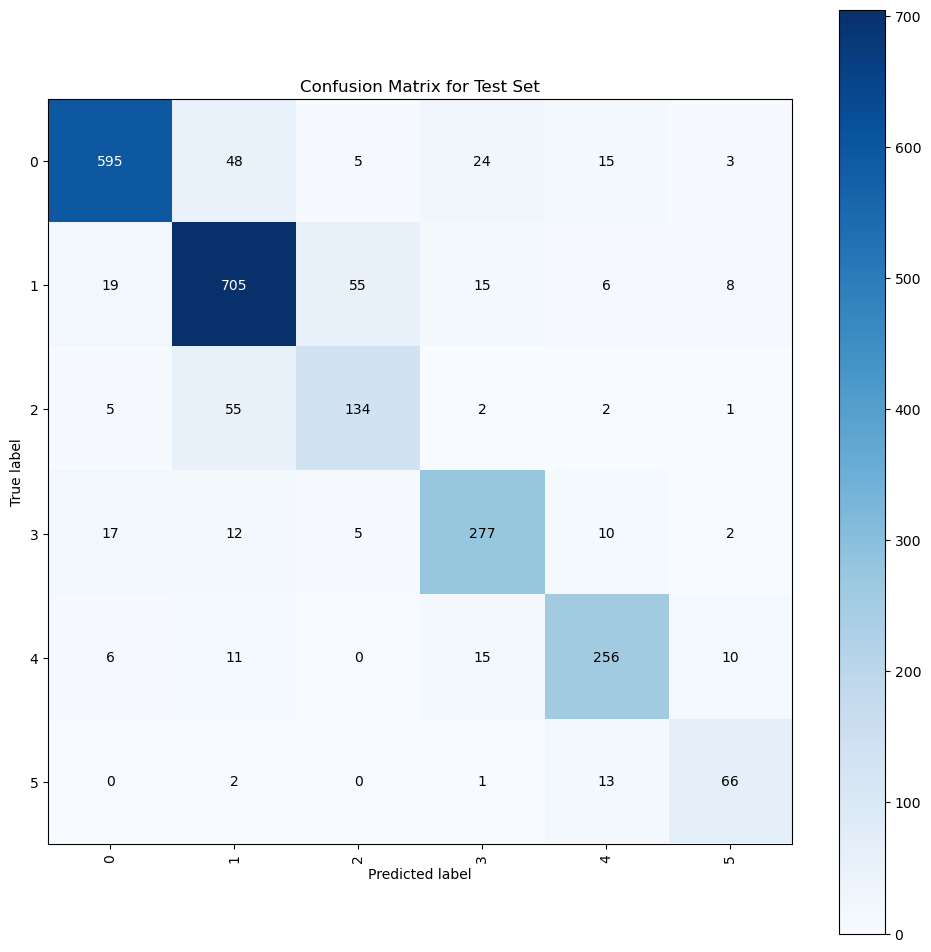

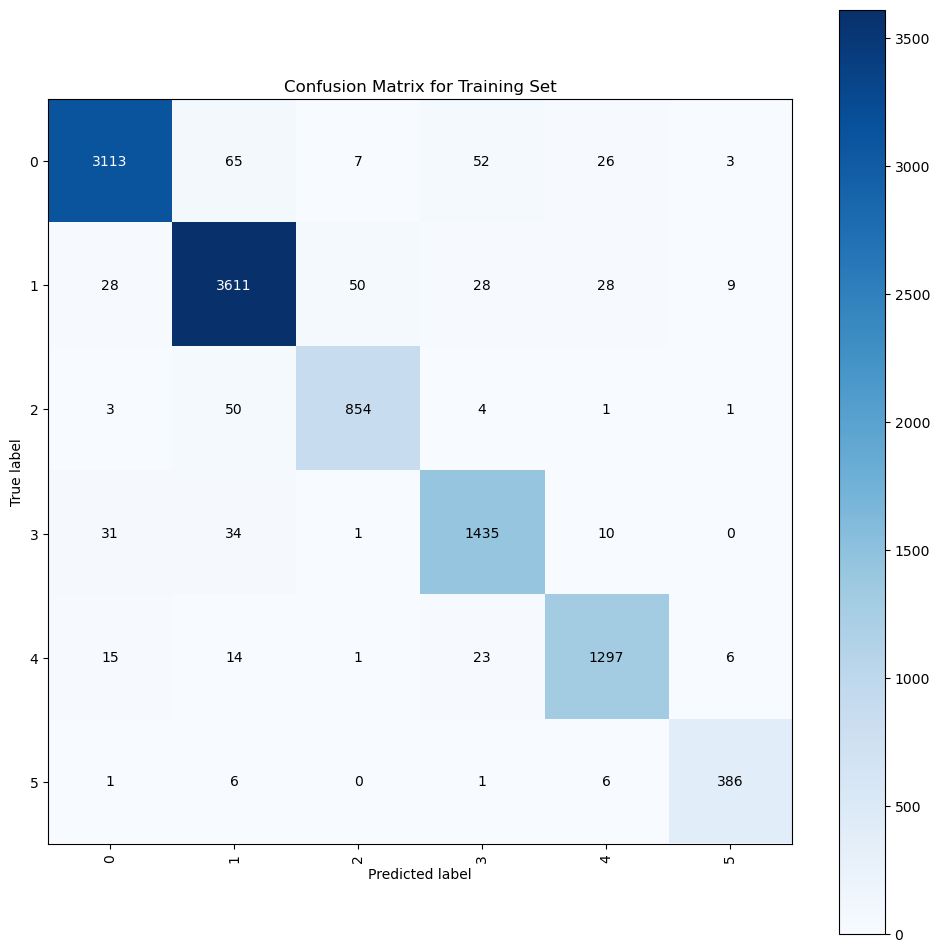

In [14]:
#Building Confusion matrix
skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred_test,
    figsize = (12,12), x_tick_rotation = 90)
plt.title('Confusion Matrix for Test Set')
plt.show()

skplt.metrics.plot_confusion_matrix(
    y_train,
    y_pred_train,
    figsize = (12,12), x_tick_rotation = 90)
plt.title('Confusion Matrix for Training Set')
plt.show()

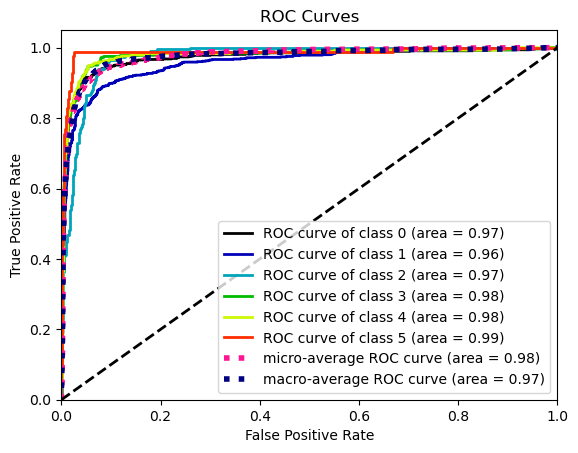

In [15]:
#Building ROC Curve for XGBoost Model
skplt.metrics.plot_roc(
    y_test,
    y_probas)
plt.show()

In [16]:
#Classification Report for XGBoost Model
report_xgb = classification_report(y_pred_test, y_test)
print('Classification Report:\n', report_xgb)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       642
           1       0.87      0.85      0.86       833
           2       0.67      0.67      0.67       199
           3       0.86      0.83      0.84       334
           4       0.86      0.85      0.85       302
           5       0.80      0.73      0.77        90

    accuracy                           0.85      2400
   macro avg       0.82      0.81      0.81      2400
weighted avg       0.85      0.85      0.85      2400



In [17]:
#Calculating bias and variance
xgb_variance = np.var(y_pred_test) #Evaluating the variance

xgb_sse = np.mean((np.mean(y_pred_test) - y)**2) #Evaluating SSE i.e. sum of squared errors

xgb_bias = xgb_sse - xgb_variance #Evaluating Variance

In [18]:
#Getting all the metrics in a single table
xgbdf=[(test_data_accuracy_xgb, test_data_f1score_xgb, test_data_precision_xgb, test_data_recall_xgb, roc_auc_xgb, xgb_bias, xgb_variance)]
xgb_score = pd.DataFrame(data=xgbdf, columns=['Accuracy','F1 Score','Precision','Recall','ROC AUC Score','Bias','Variance'])
xgb_score.insert(0, 'Model Name', 'XGBoost')
xgb_score

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC Score,Bias,Variance
0,XGBoost,0.847083,0.814999,0.821622,0.809476,0.973654,0.00358,2.253632


**CatBoost:**

**Categorical Boosting** is a machine learning algorithm, which is based on gradient boosting framework and is designed to handle categorical data more efficiently.

In [19]:
#Create catboost classifier object
ctb = CatBoostClassifier()

#Finding the best parameters
ctb_params = {"n_estimators": [100,150],        #HyperParameter Tuning
              "depth": [3,5],
              "learning_rate": [0.1,0.01,0.3]}

ctb_cv_model = GridSearchCV(ctb, param_grid=ctb_params, cv=3, n_jobs=-1, verbose=2).fit(x_train,y_train)
ctb_cv_model.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
0:	learn: 1.6789831	total: 411ms	remaining: 1m 1s
1:	learn: 1.6160645	total: 656ms	remaining: 48.6s
2:	learn: 1.5762145	total: 906ms	remaining: 44.4s
3:	learn: 1.5497780	total: 1.14s	remaining: 41.7s
4:	learn: 1.5243274	total: 1.38s	remaining: 40.1s
5:	learn: 1.4934736	total: 1.61s	remaining: 38.7s
6:	learn: 1.4755436	total: 1.85s	remaining: 37.9s
7:	learn: 1.4607110	total: 2.12s	remaining: 37.7s
8:	learn: 1.4478173	total: 2.35s	remaining: 36.8s
9:	learn: 1.4254001	total: 2.58s	remaining: 36.2s
10:	learn: 1.4165120	total: 2.82s	remaining: 35.6s
11:	learn: 1.3997424	total: 3.06s	remaining: 35.2s
12:	learn: 1.3897034	total: 3.32s	remaining: 35s
13:	learn: 1.3735680	total: 3.55s	remaining: 34.5s
14:	learn: 1.3628370	total: 3.81s	remaining: 34.3s
15:	learn: 1.3499857	total: 4.07s	remaining: 34.1s
16:	learn: 1.3424641	total: 4.33s	remaining: 33.9s
17:	learn: 1.3341643	total: 4.62s	remaining: 33.9s
18:	learn: 1.3191993	total: 4.91s

{'depth': 5, 'learning_rate': 0.3, 'n_estimators': 150}

In [20]:
#Training and testing with the best parameters
ctb_best = CatBoostClassifier(learning_rate=0.3, depth=5, n_estimators=150).fit(x_train,y_train)
y_pred_train = ctb_best.predict(x_train)
y_pred_test = ctb_best.predict(x_test)
y_probas = ctb_best.predict_proba(x_test)

0:	learn: 1.6789831	total: 203ms	remaining: 30.3s
1:	learn: 1.6160645	total: 488ms	remaining: 36.1s
2:	learn: 1.5762145	total: 781ms	remaining: 38.2s
3:	learn: 1.5497780	total: 1.06s	remaining: 38.8s
4:	learn: 1.5243274	total: 1.37s	remaining: 39.7s
5:	learn: 1.4934736	total: 1.68s	remaining: 40.4s
6:	learn: 1.4755436	total: 2s	remaining: 40.9s
7:	learn: 1.4607110	total: 2.28s	remaining: 40.4s
8:	learn: 1.4478173	total: 2.54s	remaining: 39.7s
9:	learn: 1.4254001	total: 2.81s	remaining: 39.3s
10:	learn: 1.4165120	total: 3.06s	remaining: 38.7s
11:	learn: 1.3997424	total: 3.33s	remaining: 38.3s
12:	learn: 1.3897034	total: 3.63s	remaining: 38.3s
13:	learn: 1.3735680	total: 3.88s	remaining: 37.7s
14:	learn: 1.3628370	total: 4.16s	remaining: 37.5s
15:	learn: 1.3499857	total: 4.47s	remaining: 37.5s
16:	learn: 1.3424641	total: 4.71s	remaining: 36.9s
17:	learn: 1.3341643	total: 4.98s	remaining: 36.5s
18:	learn: 1.3191993	total: 5.26s	remaining: 36.3s
19:	learn: 1.3084964	total: 5.51s	remaining:

In [21]:
#Obtaining metrics data like accuracy, recall, f1 score, precision
training_data_accuracy_ctb = accuracy_score(y_pred_train,y_train)
print("Accuracy on Training Data: ", training_data_accuracy_ctb)
test_data_accuracy_ctb = accuracy_score(y_pred_test,y_test)
print("Accuracy on Test Data: ", test_data_accuracy_ctb)

training_data_f1score_ctb = f1_score(y_pred_train,y_train, average='macro')
print("F1 Score on Training Data: ", training_data_f1score_ctb)
test_data_f1score_ctb = f1_score(y_pred_test,y_test, average='macro')
print("F1 Score on Test Data: ", test_data_f1score_ctb)

training_data_precision_ctb = precision_score(y_pred_train,y_train, average='macro')
print("Precision on Training Data: ", training_data_precision_ctb)
test_data_precision_ctb = precision_score(y_pred_test,y_test, average='macro')
print("Precision on Test Data: ", test_data_precision_ctb)

training_data_recall_ctb = recall_score(y_pred_train,y_train, average='macro')
print("Recall on Training Data: ", training_data_recall_ctb)
test_data_recall_ctb = recall_score(y_pred_test,y_test, average='macro')
print("Recall on Test Data: ", test_data_recall_ctb)

Accuracy on Training Data:  0.85125
Accuracy on Test Data:  0.8154166666666667
F1 Score on Training Data:  0.8056462494125025
F1 Score on Test Data:  0.7671010865023665
Precision on Training Data:  0.7800505246719655
Precision on Test Data:  0.7428292686146535
Recall on Training Data:  0.8467617912162567
Recall on Test Data:  0.8081217985275483


In [22]:
#Roc Auc Score Calculation
y_test_binarized_ctb = label_binarize(y_test, classes=[0,1,2,3,4,5])
roc_auc_ctb = roc_auc_score(y_test_binarized_ctb, y_probas, multi_class = 'ovr')
print("ROC AUC Score (one vs rest): ", roc_auc_ctb)

ROC AUC Score (one vs rest):  0.9730214725097914


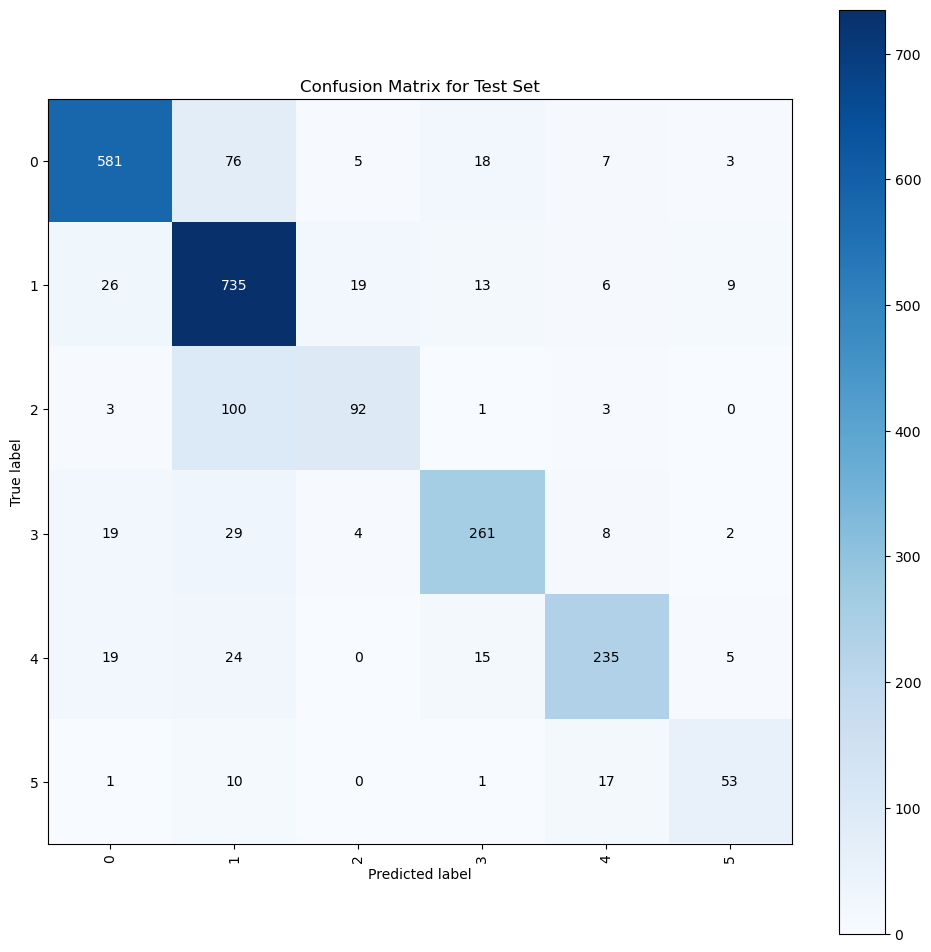

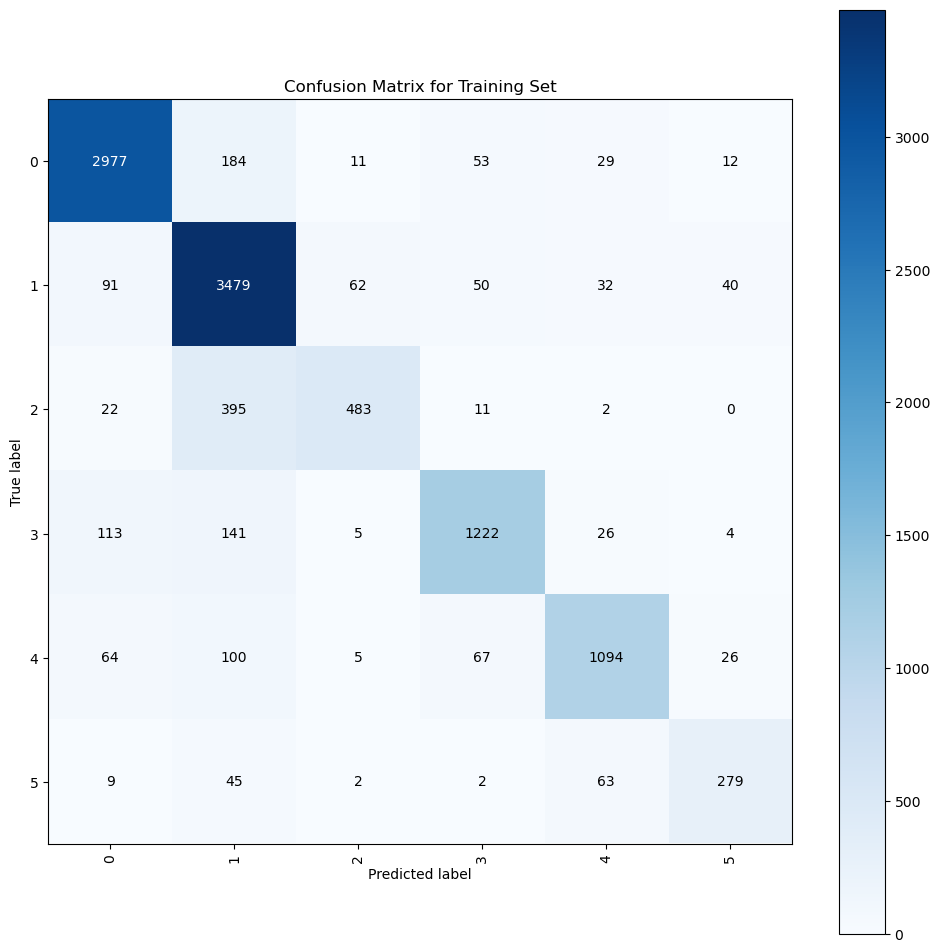

In [23]:
#Building Confusion matrix
skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred_test,
    figsize = (12,12), x_tick_rotation = 90)
plt.title('Confusion Matrix for Test Set')
plt.show()

skplt.metrics.plot_confusion_matrix(
    y_train,
    y_pred_train,
    figsize = (12,12), x_tick_rotation = 90)
plt.title('Confusion Matrix for Training Set')
plt.show()

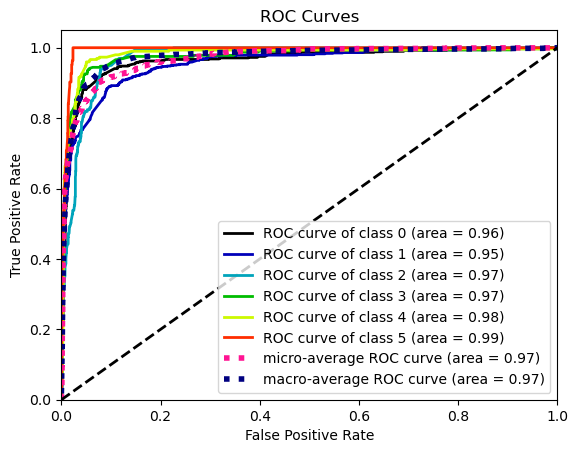

In [24]:
#Building ROC Curve for CatBoost Model
skplt.metrics.plot_roc(
    y_test,
    y_probas)
plt.show()

In [25]:
#Classification Report for CatBoost Model
report_ctb = classification_report(y_pred_test, y_test)
print('Classification Report:\n', report_ctb)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       649
           1       0.91      0.75      0.82       974
           2       0.46      0.77      0.58       120
           3       0.81      0.84      0.83       309
           4       0.79      0.85      0.82       276
           5       0.65      0.74      0.69        72

    accuracy                           0.82      2400
   macro avg       0.74      0.81      0.77      2400
weighted avg       0.83      0.82      0.82      2400



In [26]:
#Calculating bias and variance
ctb_variance = np.var(y_pred_test) #Evaluating the variance

ctb_sse = np.mean((np.mean(y_pred_test) - y)**2) #Evaluating SSE i.e. sum of squared errors

ctb_bias = ctb_sse - ctb_variance #Evaluating Variance

In [27]:
#Getting all the metrics in a single table
ctbdf=[(test_data_accuracy_ctb, test_data_f1score_ctb, test_data_precision_ctb, test_data_recall_ctb, roc_auc_ctb, ctb_bias, ctb_variance)]
ctb_score = pd.DataFrame(data=ctbdf, columns=['Accuracy','F1 Score','Precision','Recall','ROC AUC Score','Bias','Variance'])
ctb_score.insert(0, 'Model Name', 'CatBoost')
ctb_score

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC Score,Bias,Variance
0,CatBoost,0.815417,0.767101,0.742829,0.808122,0.973021,0.159901,2.098329


**Light GBM:**

**Light Gradient Boosting Machine** is an ensemble framework which constructs a stronger learner by sequentially adding weak learners in a gradient descent manner.

In [28]:
#Create a lightgbm classifier object
lgbm = LGBMClassifier()

#Finding the best parameters
lgbm_params = {"n_estimators": [100,150],        #HyperParameter Tuning
              "subsample": [0.5,0.8],
                "num_leaves": [3,22],
              "max_depth": [3,5],
              "learning_rate": [0.1,0.01,0.3]}
lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv=3, n_jobs=-1, verbose=2).fit(x_train,y_train)
lgbm_cv_model.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23222
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 914
[LightGBM] [Info] Start training from score -1.232348
[LightGBM] [Info] Start training from score -1.093092
[LightGBM] [Info] Start training from score -2.506933
[LightGBM] [Info] Start training from score -2.003142
[LightGBM] [Info] Start training from score -2.111375
[LightGBM] [Info] Start training from score -3.332205


{'learning_rate': 0.3,
 'max_depth': 3,
 'n_estimators': 150,
 'num_leaves': 3,
 'subsample': 0.5}

In [29]:
#Training and testing with the best parameters
lgbm_best = LGBMClassifier(learning_rate=0.3, max_depth=3, n_estimators=150, num_leaves=3, subsample=0.5, force_row_wise=True).fit(x_train,y_train)
y_pred_train = lgbm_best.predict(x_train)
y_pred_test = lgbm_best.predict(x_test)
y_probas = lgbm_best.predict_proba(x_test)

[LightGBM] [Info] Total Bins 23222
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 914
[LightGBM] [Info] Start training from score -1.232348
[LightGBM] [Info] Start training from score -1.093092
[LightGBM] [Info] Start training from score -2.506933
[LightGBM] [Info] Start training from score -2.003142
[LightGBM] [Info] Start training from score -2.111375
[LightGBM] [Info] Start training from score -3.332205


In [30]:
#Obtaining metrics data like accuracy, recall, f1 score, precision
training_data_accuracy_lgbm = accuracy_score(y_pred_train,y_train)
print("Accuracy on Training Data: ", training_data_accuracy_lgbm)
test_data_accuracy_lgbm = accuracy_score(y_pred_test,y_test)
print("Accuracy on Test Data: ", test_data_accuracy_lgbm)

training_data_f1score_lgbm = f1_score(y_pred_train,y_train, average='macro')
print("F1 Score on Training Data: ", training_data_f1score_lgbm)
test_data_f1score_lgbm = f1_score(y_pred_test,y_test, average='macro')
print("F1 Score on Test Data: ", test_data_f1score_lgbm)

training_data_precision_lgbm = precision_score(y_pred_train,y_train, average='macro')
print("Precision on Training Data: ", training_data_precision_lgbm)
test_data_precision_lgbm = precision_score(y_pred_test,y_test, average='macro')
print("Precision on Test Data: ", test_data_precision_lgbm)

training_data_recall_lgbm = recall_score(y_pred_train,y_train, average='macro')
print("Recall on Training Data: ", training_data_recall_lgbm)
test_data_recall_lgbm = recall_score(y_pred_test,y_test, average='macro')
print("Recall on Test Data: ", test_data_recall_lgbm)

Accuracy on Training Data:  0.8741071428571429
Accuracy on Test Data:  0.82375
F1 Score on Training Data:  0.8542758684407654
F1 Score on Test Data:  0.7833618900372916
Precision on Training Data:  0.847731836256179
Precision on Test Data:  0.7792091693851505
Recall on Training Data:  0.8626996502959384
Recall on Test Data:  0.790112926476438


In [31]:
#Roc Auc Score Calculation
y_test_binarized_lgbm = label_binarize(y_test, classes=[0,1,2,3,4,5])
roc_auc_lgbm = roc_auc_score(y_test_binarized_lgbm, y_probas, multi_class = 'ovr')
print("ROC AUC Score (one vs rest): ", roc_auc_lgbm)

ROC AUC Score (one vs rest):  0.9688194905535518


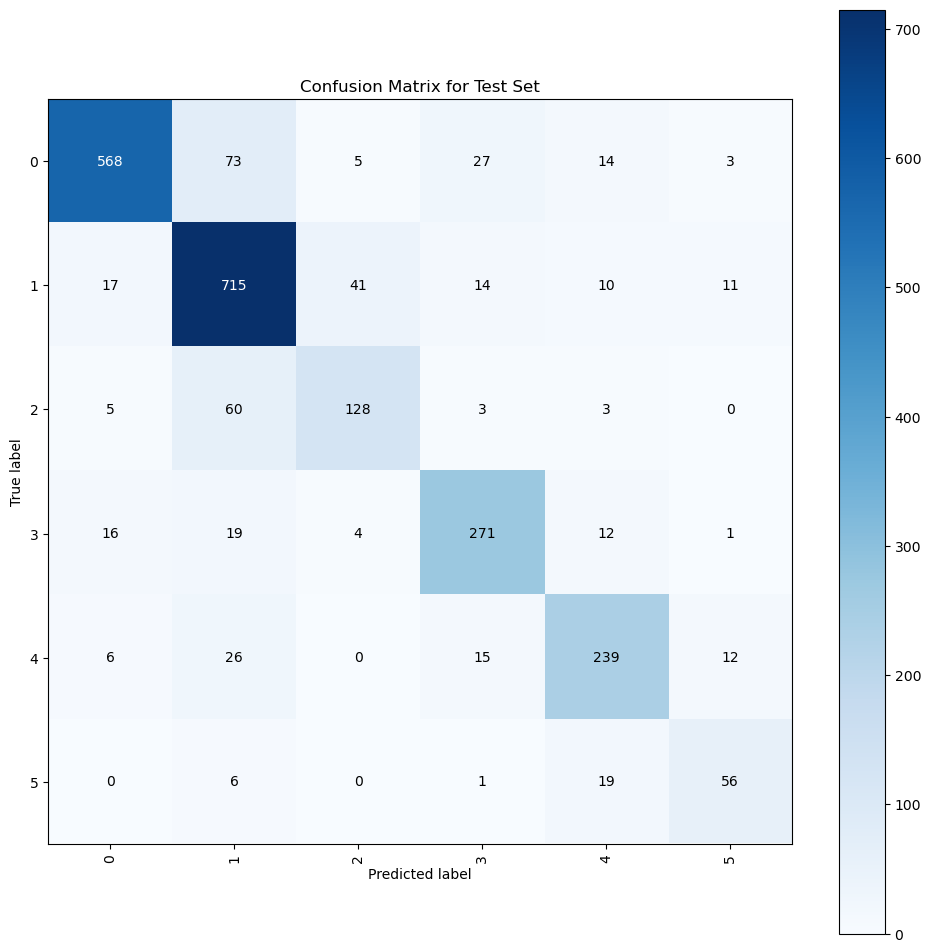

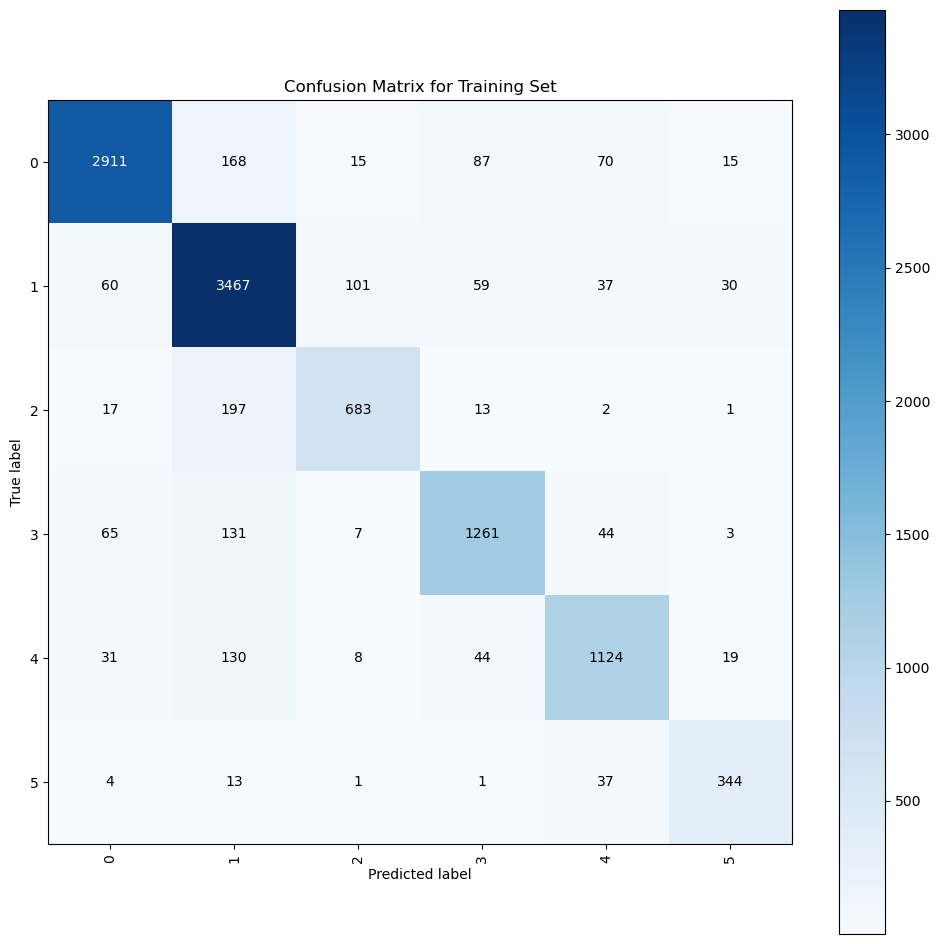

In [32]:
#Building Confusion matrix
skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred_test,
    figsize = (12,12), x_tick_rotation = 90)
plt.title('Confusion Matrix for Test Set')
plt.show()

skplt.metrics.plot_confusion_matrix(
    y_train,
    y_pred_train,
    figsize = (12,12), x_tick_rotation = 90)
plt.title('Confusion Matrix for Training Set')
plt.show()

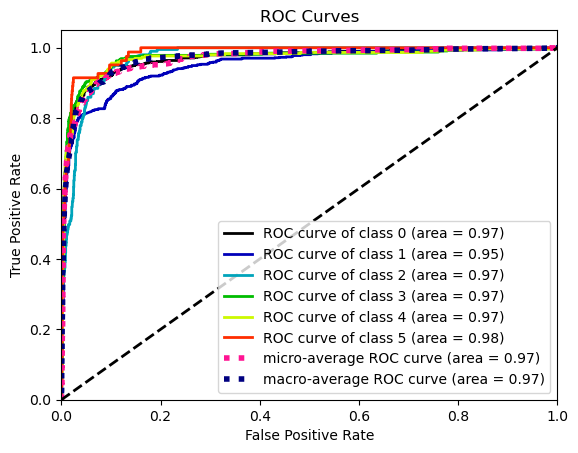

In [33]:
#Building ROC Curve for Light GBM Model
skplt.metrics.plot_roc(
    y_test,
    y_probas)
plt.show()

In [34]:
#Classification Report for Light GBM Model
report_lgbm = classification_report(y_pred_test, y_test)
print('Classification Report:\n', report_lgbm)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       612
           1       0.88      0.80      0.84       899
           2       0.64      0.72      0.68       178
           3       0.84      0.82      0.83       331
           4       0.80      0.80      0.80       297
           5       0.68      0.67      0.68        83

    accuracy                           0.82      2400
   macro avg       0.78      0.79      0.78      2400
weighted avg       0.83      0.82      0.82      2400



In [35]:
#Calculating bias and variance
lgbm_variance = np.var(y_pred_test) #Evaluating the variance

lgbm_sse = np.mean((np.mean(y_pred_test) - y)**2) #Evaluating SSE i.e. sum of squared errors

lgbm_bias = lgbm_sse - lgbm_variance #Evaluating Variance

In [36]:
#Getting all the metrics in a single table
lgbmdf=[(test_data_accuracy_lgbm, test_data_f1score_lgbm, test_data_precision_lgbm, test_data_recall_lgbm, roc_auc_lgbm, lgbm_bias, lgbm_variance)]
lgbm_score = pd.DataFrame(data=lgbmdf, columns=['Accuracy','F1 Score','Precision','Recall','ROC AUC Score','Bias','Variance'])
lgbm_score.insert(0, 'Model Name', 'Light GBM')
lgbm_score

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC Score,Bias,Variance
0,Light GBM,0.82375,0.783362,0.779209,0.790113,0.968819,0.07325,2.182396


**OverSampling/UnderSampling:**

The rule of thumb is: **never mess up with the test and validation set**. Always split into train, test and validation sets before trying oversampling/undersampling techniques.

**SMOTE:**

**Synthetic Minority Over-Sampling Technique** is a technique in which the minority class is oversampled by taking each minority class sample and introducing synthetic examples along the line segments joining any/all of the k minority class nearest neighbours.

In [37]:
#Over Sampling the minority class using SMOTE
smt = SMOTE()
x_smote, y_smote = smt.fit_resample(x_train,y_train)

**SVM:**

**Support Vector Machine** is a machine learning approach that has a classifier and regressor. It works well on balanced dataset therefore, SMOTE function is used to balance out the imbalanced dataset.

In [38]:
#Create Support Vector Classifier object
svm = SVC()

#Finding the best Parameters
svm_params = {"max_iter": [100, 150],        #HyperParameter Tuning
              "degree": [3,5],
              "C": [0.1,1,10],
              "gamma": [0.1,0.01,0.3]}
svm_cv_model = GridSearchCV(svm, svm_params, cv=3, n_jobs=-1, verbose=2).fit(x_smote,y_smote)
svm_cv_model.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


{'C': 10, 'degree': 3, 'gamma': 0.1, 'max_iter': 150}

In [39]:
#Training and testing with the best parameters
svm_best = SVC(gamma=0.1, max_iter=150, degree=3, C=10, kernel='linear', probability=True).fit(x_smote,y_smote)
y_pred_train = svm_best.predict(x_smote)
y_pred_test = svm_best.predict(x_test)
y_probas = svm_best.predict_proba(x_test)

In [40]:
#Obtaining metrics data like accuracy, recall, f1 score, precision
training_data_accuracy_svm = accuracy_score(y_pred_train,y_smote)
print("Accuracy on Training Data: ", training_data_accuracy_svm)
test_data_accuracy_svm = accuracy_score(y_pred_test,y_test)
print("Accuracy on Test Data: ", test_data_accuracy_svm)

training_data_f1score_svm = f1_score(y_pred_train,y_smote, average='macro')
print("F1 Score on Training Data: ", training_data_f1score_svm)
test_data_f1score_svm = f1_score(y_pred_test,y_test, average='macro')
print("F1 Score on Test Data: ", test_data_f1score_svm)

training_data_precision_svm = precision_score(y_pred_train,y_smote, average='macro')
print("Precision on Training Data: ", training_data_precision_svm)
test_data_precision_svm = precision_score(y_pred_test,y_test, average='macro')
print("Precision on Test Data: ", test_data_precision_svm)

training_data_recall_svm = recall_score(y_pred_train,y_smote, average='macro')
print("Recall on Training Data: ", training_data_recall_svm)
test_data_recall_svm = recall_score(y_pred_test,y_test, average='macro')
print("Recall on Test Data: ", test_data_recall_svm)

Accuracy on Training Data:  0.8850115432427633
Accuracy on Test Data:  0.7158333333333333
F1 Score on Training Data:  0.8847147781742711
F1 Score on Test Data:  0.6921036024421648
Precision on Training Data:  0.8850115432427632
Precision on Test Data:  0.7045539665210202
Recall on Training Data:  0.8856355947913982
Recall on Test Data:  0.6838364208583316


In [41]:
#Roc Auc Score Calculation
y_test_binarized_svm = label_binarize(y_test, classes=[0,1,2,3,4,5])
roc_auc_svm = roc_auc_score(y_test_binarized_svm, y_probas, multi_class = 'ovr')
print("ROC AUC Score (one vs rest): ", roc_auc_svm)

ROC AUC Score (one vs rest):  0.9296720866493139


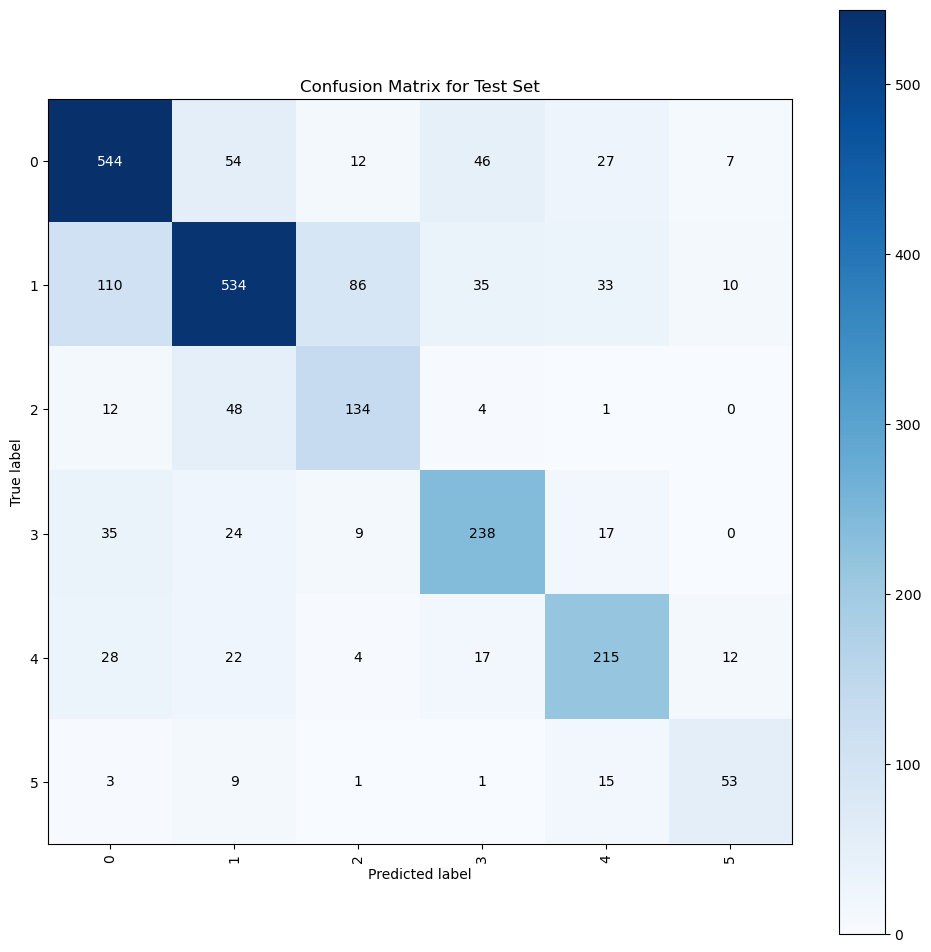

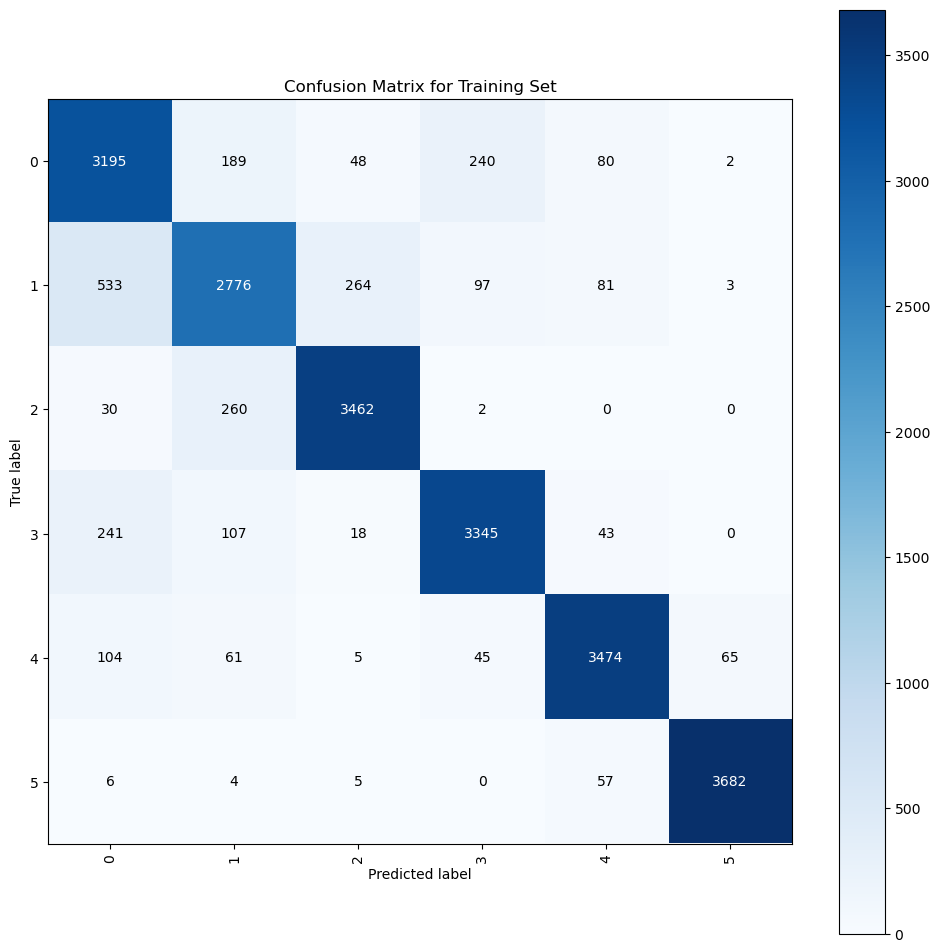

In [42]:
#Building Confusion matrix
skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred_test,
    figsize = (12,12), x_tick_rotation = 90)
plt.title('Confusion Matrix for Test Set')
plt.show()

skplt.metrics.plot_confusion_matrix(
    y_smote,
    y_pred_train,
    figsize = (12,12), x_tick_rotation = 90)
plt.title('Confusion Matrix for Training Set')
plt.show()

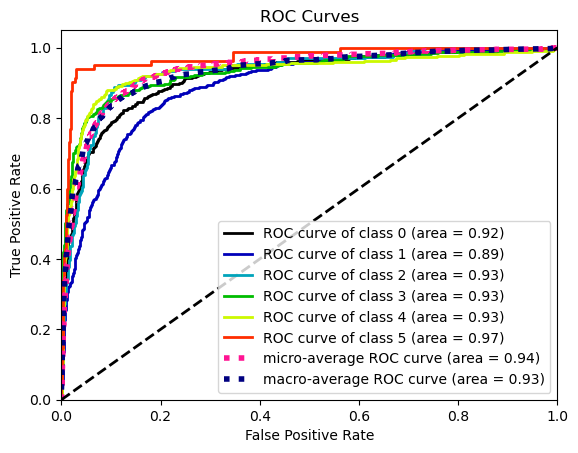

In [43]:
#Building ROC Curve for SVM Model
skplt.metrics.plot_roc(
    y_test,
    y_probas)
plt.show()

In [44]:
#Classification Report for SVM Model
report_svm = classification_report(y_pred_test, y_test)
print('Classification Report:\n', report_svm)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.77       732
           1       0.66      0.77      0.71       691
           2       0.67      0.54      0.60       246
           3       0.74      0.70      0.72       341
           4       0.72      0.70      0.71       308
           5       0.65      0.65      0.65        82

    accuracy                           0.72      2400
   macro avg       0.70      0.68      0.69      2400
weighted avg       0.72      0.72      0.72      2400



In [45]:
#Calculating bias and variance
svm_variance = np.var(y_pred_test) #Evaluating the variance

svm_sse = np.mean((np.mean(y_pred_test) - y)**2) #Evaluating SSE i.e. sum of squared errors

svm_bias = svm_sse - svm_variance #Evaluating Variance

In [46]:
#Getting all the metrics in a single table
svmdf=[(test_data_accuracy_svm, test_data_f1score_svm, test_data_precision_svm, test_data_recall_svm, roc_auc_svm, svm_bias, svm_variance)]
svm_score = pd.DataFrame(data=svmdf, columns=['Accuracy','F1 Score','Precision','Recall','ROC AUC Score','Bias','Variance'])
svm_score.insert(0, 'Model Name', 'Support Vector Machine')
svm_score

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC Score,Bias,Variance
0,Support Vector Machine,0.715833,0.692104,0.704554,0.683836,0.929672,-0.057938,2.313489


**Random Forest Classifier:**

**Random Forest** is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

In [47]:
#Create a Random Forest Classifier object
rfc = RandomForestClassifier()

#Finding the best parameters
rfc_params = {"n_estimators": [100, 150],        #HyperParameter Tuning
              "max_depth": [3,5],
              "max_features": ['log2','sqrt']}
rfc_cv_model = GridSearchCV(rfc, rfc_params, cv=3, n_jobs=-1, verbose=2).fit(x_smote,y_smote)
rfc_cv_model.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 150}

In [48]:
#Training and testing with the best parameters
rfc_best = RandomForestClassifier(n_estimators=150, max_depth=5, max_features='sqrt').fit(x_smote,y_smote)
y_pred_train = rfc_best.predict(x_smote)
y_pred_test = rfc_best.predict(x_test)
y_probas = rfc_best.predict_proba(x_test)

In [49]:
#Obtaining metrics data like accuracy, recall, f1 score, precision
training_data_accuracy_rfc = accuracy_score(y_pred_train,y_smote)
print("Accuracy on Training Data: ", training_data_accuracy_rfc)
test_data_accuracy_rfc = accuracy_score(y_pred_test,y_test)
print("Accuracy on Test Data: ", test_data_accuracy_rfc)

training_data_f1score_rfc = f1_score(y_pred_train,y_smote, average='macro')
print("F1 Score on Training Data: ", training_data_f1score_rfc)
test_data_f1score_rfc = f1_score(y_pred_test,y_test, average='macro')
print("F1 Score on Test Data: ", test_data_f1score_rfc)

training_data_precision_rfc = precision_score(y_pred_train,y_smote, average='macro')
print("Precision on Training Data: ", training_data_precision_rfc)
test_data_precision_rfc = precision_score(y_pred_test,y_test, average='macro')
print("Precision on Test Data: ", test_data_precision_rfc)

training_data_recall_rfc = recall_score(y_pred_train,y_smote, average='macro')
print("Recall on Training Data: ", training_data_recall_rfc)
test_data_recall_rfc = recall_score(y_pred_test,y_test, average='macro')
print("Recall on Test Data: ", test_data_recall_rfc)

Accuracy on Training Data:  0.8125554963594388
Accuracy on Test Data:  0.68875
F1 Score on Training Data:  0.8101272335966376
F1 Score on Test Data:  0.703504037918892
Precision on Training Data:  0.8125554963594389
Precision on Test Data:  0.7603317211079664
Recall on Training Data:  0.8188887933017744
Recall on Test Data:  0.6887702142964504


In [50]:
#Roc Auc Score Calculation
y_test_binarized_rfc = label_binarize(y_test, classes=[0,1,2,3,4,5])
roc_auc_rfc = roc_auc_score(y_test_binarized_rfc, y_probas, multi_class = 'ovr')
print("ROC AUC Score (one vs rest): ", roc_auc_rfc)

ROC AUC Score (one vs rest):  0.9191648860131517


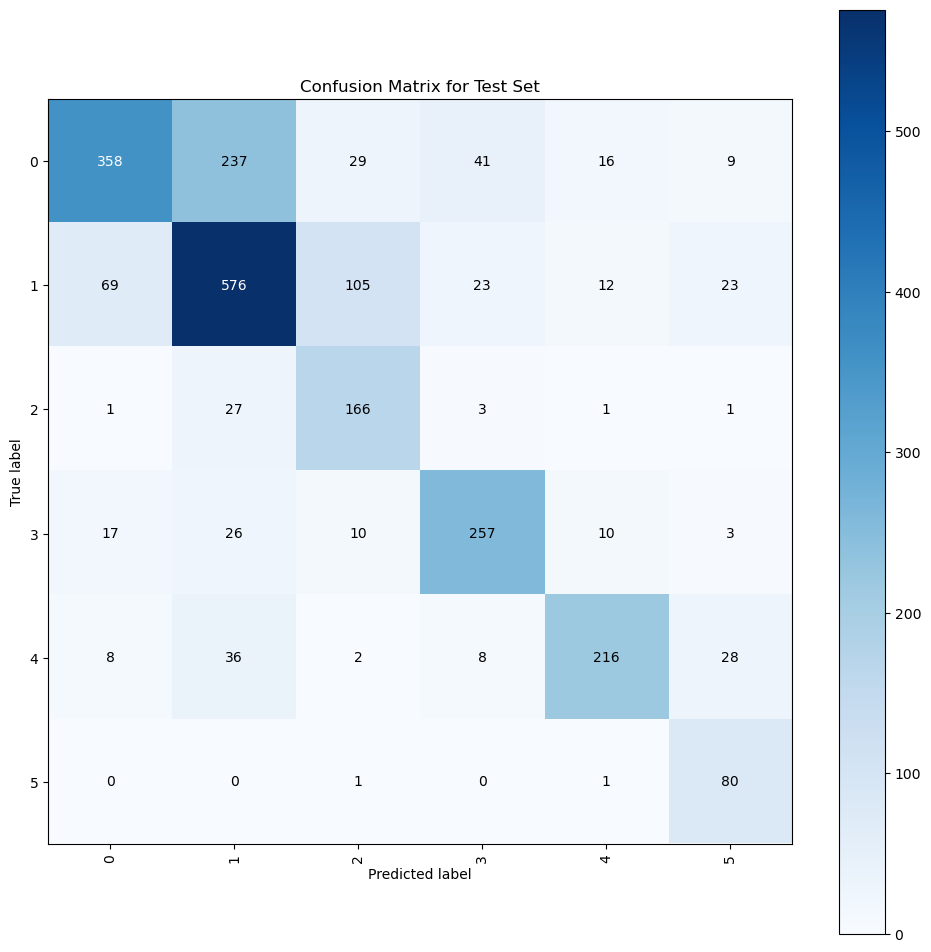

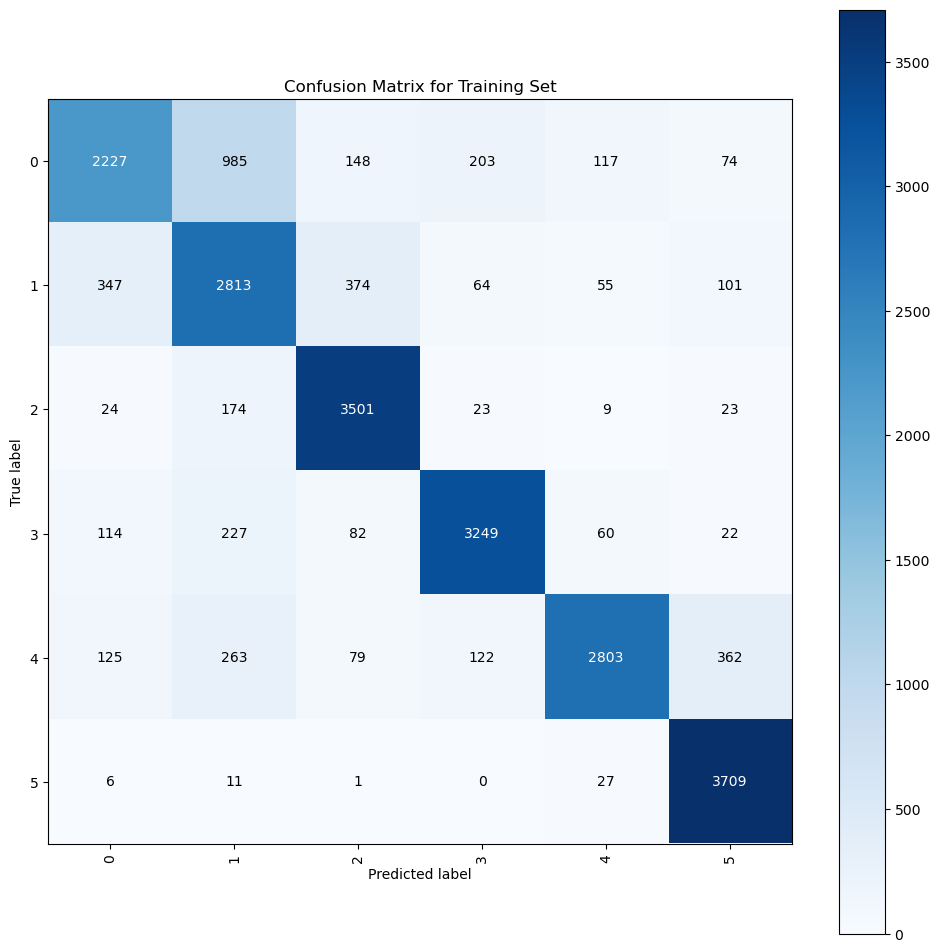

In [51]:
#Building Confusion matrix
skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred_test,
    figsize = (12,12), x_tick_rotation = 90)
plt.title('Confusion Matrix for Test Set')
plt.show()

skplt.metrics.plot_confusion_matrix(
    y_smote,
    y_pred_train,
    figsize = (12,12), x_tick_rotation = 90)
plt.title('Confusion Matrix for Training Set')
plt.show()

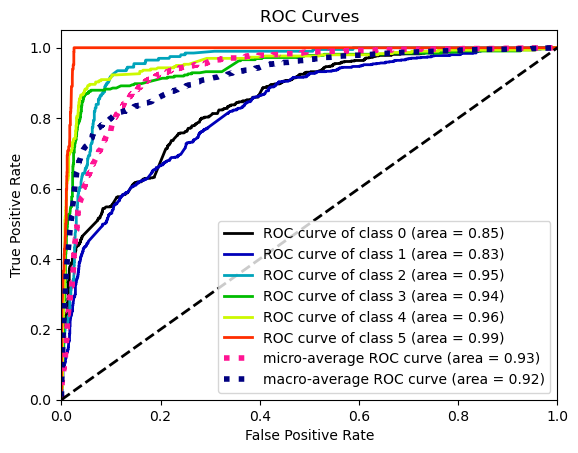

In [52]:
#Building ROC Curve for Random Forest Model
skplt.metrics.plot_roc(
    y_test,
    y_probas)
plt.show()

In [53]:
#Classification Report for Random Forest Classifier
report_rfc = classification_report(y_pred_test, y_test)
print('Classification Report:\n', report_rfc)

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.79      0.63       453
           1       0.71      0.64      0.67       902
           2       0.83      0.53      0.65       313
           3       0.80      0.77      0.78       332
           4       0.72      0.84      0.78       256
           5       0.98      0.56      0.71       144

    accuracy                           0.69      2400
   macro avg       0.76      0.69      0.70      2400
weighted avg       0.72      0.69      0.69      2400



In [54]:
#Calculating bias and variance
rfc_variance = np.var(y_pred_test) #Evaluating the variance

rfc_sse = np.mean((np.mean(y_pred_test) - y)**2) #Evaluating SSE i.e. sum of squared errors

rfc_bias = rfc_sse - rfc_variance #Evaluating Variance

In [55]:
#Getting all the metrics in a single table
rfcdf=[(test_data_accuracy_rfc, test_data_f1score_rfc, test_data_precision_rfc, test_data_recall_rfc, roc_auc_rfc, rfc_bias, rfc_variance)]
rfc_score = pd.DataFrame(data=rfcdf, columns=['Accuracy','F1 Score','Precision','Recall','ROC AUC Score','Bias','Variance'])
rfc_score.insert(0, 'Model Name', 'Random Forest')
rfc_score

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC Score,Bias,Variance
0,Random Forest,0.68875,0.703504,0.760332,0.68877,0.919165,0.112567,2.186697


**Performance Comparison:**

In [56]:
#Comparing all the models on the basis of Accuracy
predictions = pd.concat([xgb_score, ctb_score, lgbm_score, svm_score, rfc_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Accuracy'], ascending=False)

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC Score,Bias,Variance
0,XGBoost,0.847083,0.814999,0.821622,0.809476,0.973654,0.003580,2.253632
2,Light GBM,0.823750,0.783362,0.779209,0.790113,0.968819,0.073250,2.182396
1,CatBoost,0.815417,0.767101,0.742829,0.808122,0.973021,0.159901,2.098329
3,Support Vector Machine,0.715833,0.692104,0.704554,0.683836,0.929672,-0.057938,2.313489
4,Random Forest,0.688750,0.703504,0.760332,0.688770,0.919165,0.112567,2.186697


In [57]:
#Comparing all the models on the basis of Variance
predictions = pd.concat([xgb_score, ctb_score, lgbm_score, svm_score, rfc_score], ignore_index=True, sort=False)
predictions.sort_values(by=['ROC AUC Score'], ascending=False)

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC Score,Bias,Variance
0,XGBoost,0.847083,0.814999,0.821622,0.809476,0.973654,0.003580,2.253632
1,CatBoost,0.815417,0.767101,0.742829,0.808122,0.973021,0.159901,2.098329
2,Light GBM,0.823750,0.783362,0.779209,0.790113,0.968819,0.073250,2.182396
3,Support Vector Machine,0.715833,0.692104,0.704554,0.683836,0.929672,-0.057938,2.313489
4,Random Forest,0.688750,0.703504,0.760332,0.688770,0.919165,0.112567,2.186697


**ROC AUC Score** tells us how efficient the model is. It ranges from 0 to 1, where 0.5 indicates random guessing and 1 indicates perfect performance.

The performance comparison tables above shows that XGBoost model is the best out of all other models as it is having the maximum accuracy and roc auc score.

Therefore, we would be validating XGBoost Model on the validation datasets.

**Validating on XGBoost Model:**

In [58]:
#Validating XGBoost Model on Validation Dataset
xgb_valid = XGBClassifier(learning_rate=0.3, max_depth=5, n_estimators=150, subsample=0.8, decision_function_shape='ovr', probability=True).fit(x_valid,y_valid)
y_pred_valid = xgb_valid.predict(x_valid)
y_probas_valid = xgb_valid.predict_proba(x_valid)

In [59]:
#Obtaining metrics data like accuracy, recall, f1 score, precision
validating_data_accuracy_xgb = accuracy_score(y_pred_valid, y_valid)
print("Accuracy on Validation Data: ", validating_data_accuracy_xgb)

validating_data_f1score_xgb = f1_score(y_pred_valid, y_valid, average='macro')
print("F1 Score on Validation Data: ", validating_data_f1score_xgb)

validating_data_precision_xgb = precision_score(y_pred_valid, y_valid, average='macro')
print("Precision on Validation Data: ", validating_data_precision_xgb)

validating_data_recall_xgb = recall_score(y_pred_valid, y_valid, average='macro')
print("Recall on Validation Data: ", validating_data_recall_xgb)

Accuracy on Validation Data:  0.9720833333333333
F1 Score on Validation Data:  0.9736082548302775
Precision on Validation Data:  0.969054918976829
Recall on Validation Data:  0.9784363248891695


In [60]:
#Roc Auc Score Calculation for Validation set
y_valid_binarized_xgb = label_binarize(y_valid, classes=[0,1,2,3,4,5])
roc_auc_valid_xgb = roc_auc_score(y_valid_binarized_xgb, y_probas_valid, multi_class = 'ovr')
print("ROC AUC Score (one vs rest): ", roc_auc_valid_xgb)

ROC AUC Score (one vs rest):  0.9991412634639808


In [61]:
#Classification Report for XGBoost Model on Validation dataset
report_valid_xgb = classification_report(y_pred_valid, y_valid)
print('Classification Report:\n', report_valid_xgb)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       715
           1       0.98      0.96      0.97       819
           2       0.96      0.98      0.97       188
           3       0.95      0.98      0.97       316
           4       0.95      0.99      0.97       272
           5       0.99      0.99      0.99        90

    accuracy                           0.97      2400
   macro avg       0.97      0.98      0.97      2400
weighted avg       0.97      0.97      0.97      2400



In [62]:
#Getting all the metrics in a single table
xgbvaliddf=[(validating_data_accuracy_xgb, validating_data_f1score_xgb, validating_data_precision_xgb, validating_data_recall_xgb, roc_auc_valid_xgb)]
xgb_valid_score = pd.DataFrame(data=xgbvaliddf, columns=['Accuracy','F1 Score','Precision','Recall','ROC AUC Score'])
xgb_valid_score.insert(0, 'Model Name', 'XGBoost')
xgb_valid_score

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC Score
0,XGBoost,0.972083,0.973608,0.969055,0.978436,0.999141
